https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

https://pandas.pydata.org/docs/reference/api/pandas.read_parquet.html

In [1]:
import os
import json
import pickle
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [4]:
from IPython.display import display, HTML
import warnings

In [5]:
display(HTML("<style>.container { width:100% !important; }</style>"))
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:.2f}".format

In [6]:
cd ..

C:\Users\KonuTech\PycharmProjects\mlops-zoomcamp-training


In [7]:
CONFIG = 'config.json'

In [8]:
TRAIN = 'yellow_tripdata_2022-01.parquet'

In [9]:
TEST = 'yellow_tripdata_2022-02.parquet'

In [10]:
# Get the absolute path of the file within the INPUTS directory
FILE_PATH_TRAIN = os.path.join(os.getcwd(), 'INPUTS', TRAIN)

# Print the file path
print(FILE_PATH_TRAIN)

C:\Users\KonuTech\PycharmProjects\mlops-zoomcamp-training\INPUTS\yellow_tripdata_2022-01.parquet


In [11]:
# Get the absolute path of the file within the INPUTS directory
FILE_PATH_TEST = os.path.join(os.getcwd(), 'INPUTS', TEST)

# Print the file path
print(FILE_PATH_TEST)

C:\Users\KonuTech\PycharmProjects\mlops-zoomcamp-training\INPUTS\yellow_tripdata_2022-02.parquet


In [12]:
# Get the absolute path of the config within the CONFIGS directory
CONFIG_PATH = os.path.join(os.getcwd(), 'CONFIGS', CONFIG)

# Print the fileconfig_pathpath
print(CONFIG_PATH)

C:\Users\KonuTech\PycharmProjects\mlops-zoomcamp-training\CONFIGS\config.json


In [13]:
with open(CONFIG_PATH, encoding='utf-8') as f:
    CONFIG = json.load(f)

In [14]:
df = pd.read_parquet(FILE_PATH_TRAIN)

In [15]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.00,3.80,1.00,N,142,236,1,14.50,3.00,0.50,3.65,0.00,0.30,21.95,2.50,0.00
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.00,2.10,1.00,N,236,42,1,8.00,0.50,0.50,4.00,0.00,0.30,13.30,0.00,0.00
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.00,0.97,1.00,N,166,166,1,7.50,0.50,0.50,1.76,0.00,0.30,10.56,0.00,0.00
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.00,1.09,1.00,N,114,68,2,8.00,0.50,0.50,0.00,0.00,0.30,11.80,2.50,0.00
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.00,4.30,1.00,N,68,163,1,23.50,0.50,0.50,3.00,0.00,0.30,30.30,2.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.00,0.50,2.39,0.00,0.30,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.00,0.50,4.35,0.00,0.30,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.00,0.50,2.00,0.00,0.30,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.00,0.50,0.00,0.00,0.30,15.70,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [17]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [18]:
duration_std = df['duration'].std()

print("Standard deviation of trip duration:", duration_std)

Standard deviation of trip duration: 46.44530513776802


In [19]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

In [20]:
df.loc[((df.duration >= 1) & (df.duration <= 60)), 'duration'].mean()

12.671278846471523

In [21]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.00,3.80,1.00,N,142,236,1,14.50,3.00,0.50,3.65,0.00,0.30,21.95,2.50,0.00,17.82
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.00,2.10,1.00,N,236,42,1,8.00,0.50,0.50,4.00,0.00,0.30,13.30,0.00,0.00,8.40
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.00,0.97,1.00,N,166,166,1,7.50,0.50,0.50,1.76,0.00,0.30,10.56,0.00,0.00,8.97
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.00,1.09,1.00,N,114,68,2,8.00,0.50,0.50,0.00,0.00,0.30,11.80,2.50,0.00,10.03
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.00,4.30,1.00,N,68,163,1,23.50,0.50,0.50,3.00,0.00,0.30,30.30,2.50,0.00,37.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.00,0.50,2.39,0.00,0.30,13.69,NaN,NaN,5.97
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.00,0.50,4.35,0.00,0.30,24.45,NaN,NaN,10.65
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.00,0.50,2.00,0.00,0.30,16.52,NaN,NaN,11.00
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.00,0.50,0.00,0.00,0.30,15.70,NaN,NaN,12.05


In [22]:
2421440 / 2463931 

0.9827547930522406

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421440 entries, 0 to 2463930
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           object        
 8   DOLocationID           object        
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [24]:
duration_std = df['duration'].std()

print("Standard deviation of trip duration:", duration_std)

Standard deviation of trip duration: 8.99928164030397


In [25]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [26]:
train_dicts

[{'PULocationID': '142', 'DOLocationID': '236', 'trip_distance': 3.8},
 {'PULocationID': '236', 'DOLocationID': '42', 'trip_distance': 2.1},
 {'PULocationID': '166', 'DOLocationID': '166', 'trip_distance': 0.97},
 {'PULocationID': '114', 'DOLocationID': '68', 'trip_distance': 1.09},
 {'PULocationID': '68', 'DOLocationID': '163', 'trip_distance': 4.3},
 {'PULocationID': '138', 'DOLocationID': '161', 'trip_distance': 10.3},
 {'PULocationID': '233', 'DOLocationID': '87', 'trip_distance': 5.07},
 {'PULocationID': '238', 'DOLocationID': '152', 'trip_distance': 2.02},
 {'PULocationID': '166', 'DOLocationID': '236', 'trip_distance': 2.71},
 {'PULocationID': '236', 'DOLocationID': '141', 'trip_distance': 0.78},
 {'PULocationID': '141', 'DOLocationID': '229', 'trip_distance': 1.91},
 {'PULocationID': '114', 'DOLocationID': '90', 'trip_distance': 0.82},
 {'PULocationID': '234', 'DOLocationID': '113', 'trip_distance': 0.73},
 {'PULocationID': '246', 'DOLocationID': '79', 'trip_distance': 2.16},
 

In [27]:
dv = DictVectorizer()

In [28]:
X_train = dv.fit_transform(train_dicts)

In [29]:
X_train

<2421440x516 sparse matrix of type '<class 'numpy.float64'>'
	with 7264320 stored elements in Compressed Sparse Row format>

In [30]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=105',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',

In [31]:
len(dv.feature_names_)

516

In [32]:
target = 'duration'
y_train = df[target].values

In [33]:
y_train

array([17.81666667,  8.4       ,  8.96666667, ..., 11.        ,
       12.05      , 27.        ])

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = lr.predict(X_train)

In [36]:
mean_squared_error(y_train, y_pred, squared=False)

7.001496179429168

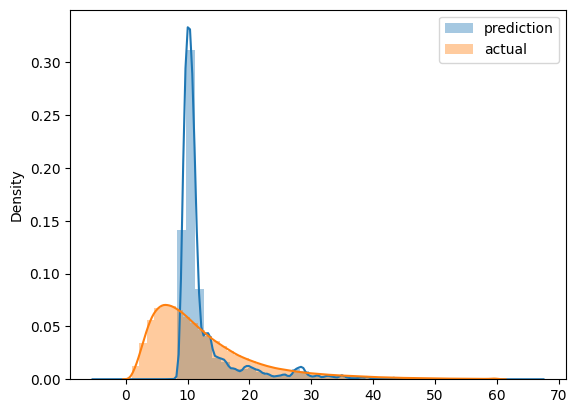

In [37]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [38]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [39]:
df_train = read_dataframe(FILE_PATH_TRAIN)
df_val = read_dataframe(FILE_PATH_TEST)

In [40]:
len(df_train), len(df_val)

(2421440, 2918187)

##### preprocessing

In [41]:
# df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
# df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421440 entries, 0 to 2463930
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           object        
 8   DOLocationID           object        
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [43]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2918187 entries, 0 to 2979430
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           object        
 8   DOLocationID           object        
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [44]:
df_val['PULocationID'].unique()

array(['138', '239', '140', '48', '142', '238', '132', '143', '234',
       '233', '186', '79', '249', '107', '164', '151', '263', '229', '68',
       '230', '237', '100', '170', '144', '162', '148', '137', '141',
       '224', '161', '90', '7', '163', '43', '211', '114', '74', '113',
       '125', '244', '50', '231', '87', '264', '41', '17', '246', '75',
       '42', '70', '260', '129', '40', '158', '236', '181', '88', '166',
       '4', '24', '116', '226', '262', '65', '232', '173', '152', '45',
       '256', '13', '209', '225', '261', '168', '190', '265', '216',
       '134', '55', '135', '14', '39', '212', '235', '191', '38', '61',
       '243', '10', '242', '210', '248', '51', '112', '195', '11', '37',
       '146', '69', '53', '127', '218', '182', '155', '19', '33', '145',
       '179', '215', '197', '247', '223', '77', '177', '66', '157', '9',
       '139', '193', '102', '21', '205', '63', '213', '254', '131', '91',
       '95', '241', '189', '97', '159', '200', '78', '119', '13

In [45]:
len(df_val['PULocationID'].unique())

254

In [46]:
len(df_val['DOLocationID'].unique())

260

In [47]:
len(df_val['PULocationID'].unique()) + len(df_val['DOLocationID'].unique())

514

In [48]:
dv = DictVectorizer()

In [49]:
dv

DictVectorizer()

In [50]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
train_dicts

[{'PULocationID': '142', 'DOLocationID': '236', 'trip_distance': 3.8},
 {'PULocationID': '236', 'DOLocationID': '42', 'trip_distance': 2.1},
 {'PULocationID': '166', 'DOLocationID': '166', 'trip_distance': 0.97},
 {'PULocationID': '114', 'DOLocationID': '68', 'trip_distance': 1.09},
 {'PULocationID': '68', 'DOLocationID': '163', 'trip_distance': 4.3},
 {'PULocationID': '138', 'DOLocationID': '161', 'trip_distance': 10.3},
 {'PULocationID': '233', 'DOLocationID': '87', 'trip_distance': 5.07},
 {'PULocationID': '238', 'DOLocationID': '152', 'trip_distance': 2.02},
 {'PULocationID': '166', 'DOLocationID': '236', 'trip_distance': 2.71},
 {'PULocationID': '236', 'DOLocationID': '141', 'trip_distance': 0.78},
 {'PULocationID': '141', 'DOLocationID': '229', 'trip_distance': 1.91},
 {'PULocationID': '114', 'DOLocationID': '90', 'trip_distance': 0.82},
 {'PULocationID': '234', 'DOLocationID': '113', 'trip_distance': 0.73},
 {'PULocationID': '246', 'DOLocationID': '79', 'trip_distance': 2.16},
 

In [51]:
len(train_dicts)

2421440

In [54]:
len(train_dicts[0])

3

In [57]:
X_train = dv.fit_transform(train_dicts)

before: (2421440, 20667)

In [58]:
X_train.shape

(2421440, 516)

In [59]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [60]:
len(val_dicts)

2918187

In [61]:
X_val = dv.transform(val_dicts)

In [62]:
X_val.shape

(2918187, 516)

In [63]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [64]:
y_train.shape, y_val.shape

((2421440,), (2918187,))

In [65]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = lr.predict(X_val)

In [67]:
mean_squared_error(y_val, y_pred, squared=False)

7.795498346156581

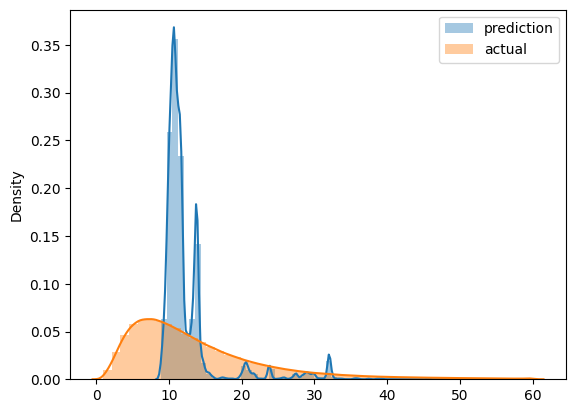

In [72]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_val, label='actual')

plt.legend()

In [68]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [69]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

Lasso(alpha=0.01)

In [70]:
y_pred = lr.predict(X_val)

In [71]:
mean_squared_error(y_val, y_pred, squared=False)

8.115993320463872